In [11]:
#import seaborn as sns
import pandas as pd
import cooler
import cooltools
from hicool.function.features import compartment_decomposition,tad_insulation,fast_oe
from hicool.function.dataloader import load_cool_adj,load_scool_adj
from hicool.process import AutoLoad

In [3]:
scool_path = '/store/zlwang/Workspace/Project/scHiC/result/DipC2019/DipC2019_100000.scool'
raw_adjs = load_scool_adj(scool_path)

In [21]:
scool = "/store/zlwang/Workspace/Myproject/hicool/tests/Test/Test_100000.scool"
cell_list =  AutoLoad(scool).load_scool_cells()
raw_adjs  = load_scool_adj(scool)
raw_adjs.shape


torch.Size([6, 1955, 1955])

In [22]:
for cell in cell_list:
    cooler.balance_cooler(cooler.Cooler(cell),store=True,max_iters=1000)

/store/zlwang/anaconda3/envs/hicool/lib/python3.8/site-packages/cooler/balance.py:111: ConvergenceWarning: Iteration limit reached without convergence.
  warnings.warn(
/store/zlwang/anaconda3/envs/hicool/lib/python3.8/site-packages/cooler/balance.py:104: RuntimeWarning: overflow encountered in true_divide
  bias /= marg
/store/zlwang/anaconda3/envs/hicool/lib/python3.8/site-packages/cooler/balance.py:102: RuntimeWarning: invalid value encountered in true_divide
  marg = marg / nzmarg.mean()
/store/zlwang/.local/lib/python3.8/site-packages/numpy/core/_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/store/zlwang/anaconda3/envs/hicool/lib/python3.8/site-packages/cooler/balance.py:111: ConvergenceWarning: Iteration limit reached without convergence.
  warnings.warn(
/store/zlwang/anaconda3/envs/hicool/lib/python3.8/site-packages/cooler/balance.py:111: ConvergenceWarning: Iteration limit reached without convergence.
  warnings.warn(
/s

In [23]:
for cell in cell_list:
    fast_oe(cell,store=True)

/store/zlwang/anaconda3/envs/hicool/lib/python3.8/site-packages/cooler/core.py:123: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
  elif is_categorical(data):


Writing OE normalized matrix to  /store/zlwang/Workspace/Myproject/hicool/tests/Test/Test_100000.scool::/cells/GSM3588984_cell_146


/store/zlwang/anaconda3/envs/hicool/lib/python3.8/site-packages/cooler/core.py:123: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
  elif is_categorical(data):


Writing OE normalized matrix to  /store/zlwang/Workspace/Myproject/hicool/tests/Test/Test_100000.scool::/cells/GSM3589011_cell_173


/store/zlwang/anaconda3/envs/hicool/lib/python3.8/site-packages/cooler/core.py:123: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
  elif is_categorical(data):


Writing OE normalized matrix to  /store/zlwang/Workspace/Myproject/hicool/tests/Test/Test_100000.scool::/cells/GSM3589022_cell_184


/store/zlwang/anaconda3/envs/hicool/lib/python3.8/site-packages/cooler/core.py:123: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
  elif is_categorical(data):


Writing OE normalized matrix to  /store/zlwang/Workspace/Myproject/hicool/tests/Test/Test_100000.scool::/cells/GSM3589035_cell_197


/store/zlwang/anaconda3/envs/hicool/lib/python3.8/site-packages/cooler/core.py:123: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
  elif is_categorical(data):


Writing OE normalized matrix to  /store/zlwang/Workspace/Myproject/hicool/tests/Test/Test_100000.scool::/cells/GSM3589041_cell_203
Writing OE normalized matrix to  /store/zlwang/Workspace/Myproject/hicool/tests/Test/Test_100000.scool::/cells/GSM3589060_cell_222


/store/zlwang/anaconda3/envs/hicool/lib/python3.8/site-packages/cooler/core.py:123: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
  elif is_categorical(data):


In [24]:
oe_adjs = load_scool_adj(scool,transform='OE')

In [25]:
oe_adjs = load_scool_adj(scool,field='OE')

In [26]:
oe = oe_adjs[0]
comp = compartment_decomposition(cell,chrom='chr1',return_vector=False)
tad = tad_insulation(cell,chrom='chr1')


<AxesSubplot:>

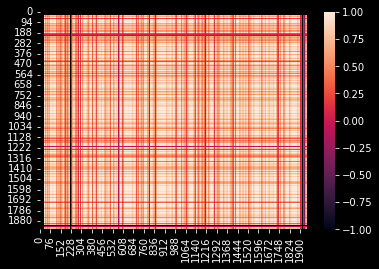

In [27]:
import seaborn as sns
sns.heatmap(comp)

In [19]:
oe_adjs = load_cool_adj(cool_path,transform='OE')

In [12]:
sample1_path

'/store/zlwang/Workspace/Project/scHiC/result/DipC2019/DipC2019_100000.scool::/cells/GSM3588980_cell_142'

In [36]:

oe_adjs[oe_adjs>5] = 5

In [39]:
pd.DataFrame(oe_adjs.numpy()).to_csv('/store/wcsun/sigle_cell_hic/embedding_max/data/oe_adjs.csv',index=0,header=0)

In [2]:
cool_path =  '/store/zlwang/Workspace/Project/scHiC/result/DipC2019/DipC2019_100000_merged.cool'
chrom = 'chr1'
clr = cooler.Cooler(cool_path)
raw_adj = clr.matrix(balance=False).fetch(chrom,chrom)

In [3]:
comp_adj = compartment_adj(cool_path,chrom='chr1')

In [4]:
t_adj = tad_adj(cool_path,chrom='chr1')

In [17]:
raw_adj

,0,1,2,3,4,5,6,7,8,9,...,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,0,0,0,0,0,0,0,0,0,0,...,17,27,39,93,214,421,171,33,16,0
1951,0,0,0,0,0,0,0,0,0,0,...,19,25,33,64,109,171,487,137,20,0
1952,0,0,0,0,0,0,0,0,0,0,...,18,2,17,20,27,33,137,286,54,0
1953,0,0,0,0,0,0,0,0,0,0,...,4,4,1,11,6,16,20,54,131,0


In [12]:
raw_adj=pd.DataFrame(raw_adj)
raw_adj.to_csv('/store/wcsun/sigle_cell_hic/embedding_max/data/raw_adj.csv',index=0,header=0)

In [14]:
comp_adj2=pd.DataFrame(comp_adj).fillna(0)

In [41]:
comp_adj2.to_csv('/store/wcsun/sigle_cell_hic/embedding_max/data/comp_adj2.csv',index=0,header=0)

In [45]:
pd.DataFrame(t_adj).fillna(0).to_csv('/store/wcsun/sigle_cell_hic/embedding_max/data/t_adj.csv',index=0,header=0)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

<AxesSubplot:>

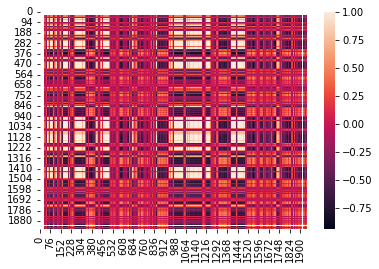

In [16]:
import seaborn as sns
sns.heatmap(comp_adj)

<AxesSubplot:>

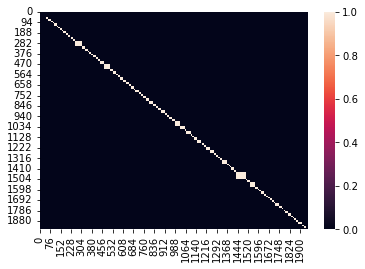

In [5]:
sns.heatmap(t_adj)